<a href="https://colab.research.google.com/github/AlonaOlex/Data-Analysis/blob/main/Exploratory_data_analysis_for_online_store.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Connecting Google Drive
from google.colab import drive
drive.mount("/content/drive")

# Changing work folder
%cd /content/drive/MyDrive/Final project

Mounted at /content/drive
/content/drive/MyDrive/Final project


### Data overview
- Uploading dataset
- Shape
- Info
- value_counts()

Key Columns are Product ID & id, and Country Code & alpha-3

##### Events

In [ ]:
# Uploading dataset
ev = pd.read_csv("events.csv")
ev.head()

,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost
0,100640618,10/8/2014,10/18/2014,M,NOR,2103,Online,650.0,205.70,117.11
1,100983083,8/11/2016,8/11/2016,C,SRB,2103,Offline,1993.0,205.70,117.11
2,101025998,7/18/2014,8/11/2014,M,NaN,7940,Online,4693.0,668.27,502.54
3,102230632,5/13/2017,6/13/2017,L,MNE,2455,Online,1171.0,109.28,35.84
4,103435266,8/11/2012,9/18/2012,H,SRB,1270,Offline,7648.0,47.45,31.79


In [ ]:
print(ev.shape)

(1330, 10)


In [ ]:
ev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        1330 non-null   int64  
 1   Order Date      1330 non-null   object 
 2   Ship Date       1330 non-null   object 
 3   Order Priority  1330 non-null   object 
 4   Country Code    1248 non-null   object 
 5   Product ID      1330 non-null   int64  
 6   Sales Channel   1330 non-null   object 
 7   Units Sold      1328 non-null   float64
 8   Unit Price      1330 non-null   float64
 9   Unit Cost       1330 non-null   float64
dtypes: float64(3), int64(2), object(5)
memory usage: 104.0+ KB


In [ ]:
ev["Product ID"].value_counts()

,count
Product ID,
8681,123
1270,121
3127,115
5988,114
8293,114
4594,112
7331,112
8875,111
2455,105


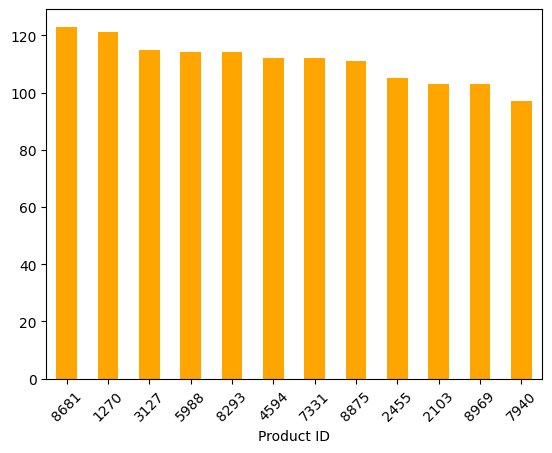

In [ ]:
ev["Product ID"].value_counts().plot(kind="bar", color="orange")
plt.xticks(rotation=45)

plt.show()


##### Countries

In [ ]:
co = pd.read_csv("countries.csv")
co.head()

,name,alpha-2,alpha-3,region,sub-region
0,Afghanistan,AF,AFG,Asia,Southern Asia
1,Åland Islands,AX,ALA,Europe,Northern Europe
2,Albania,AL,ALB,Europe,Southern Europe
3,Algeria,DZ,DZA,Africa,Northern Africa
4,American Samoa,AS,ASM,Oceania,Polynesia


In [ ]:
print(co.shape)

(249, 5)


In [ ]:
co.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        249 non-null    object
 1   alpha-2     248 non-null    object
 2   alpha-3     249 non-null    object
 3   region      248 non-null    object
 4   sub-region  248 non-null    object
dtypes: object(5)
memory usage: 9.9+ KB


In [ ]:
co["region"].value_counts()


,count
region,
Africa,60
Americas,57
Asia,51
Europe,51
Oceania,29


##### Products

In [ ]:
df= pd.read_csv("products.csv")
df.head()

,id,item_type
0,2103,Cereal
1,7940,Household
2,2455,Clothes
3,1270,Beverages
4,8681,Office Supplies


In [ ]:
print(df.shape)

(12, 2)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         12 non-null     int64 
 1   item_type  12 non-null     object
dtypes: int64(1), object(1)
memory usage: 324.0+ bytes


### Data cleaning
- Finding a percentage of missing data
 - the % of missing data is higher than 0,004% that is why we cannot delete the rows with missing data. I added the median meanings for both product ID to column "Units sold". In countries data base - I added "unknown" region and sub-region in Antarctica row. I cannot to indentify country codes and we don't have meaning for them.
- Convert the order date & Ship Date columns to datetime
- Checking for duplicates in data
 - We don't have them in our data sets
- Anomalies


In [ ]:
print(ev.isna().sum())

Order ID           0
Order Date         0
Ship Date          0
Order Priority     0
Country Code      82
Product ID         0
Sales Channel      0
Units Sold         2
Unit Price         0
Unit Cost          0
dtype: int64


In [ ]:
print(ev.isna().sum() / ev.shape[0] * 100)

Order ID          0.000000
Order Date        0.000000
Ship Date         0.000000
Order Priority    0.000000
Country Code      6.165414
Product ID        0.000000
Sales Channel     0.000000
Units Sold        0.150376
Unit Price        0.000000
Unit Cost         0.000000
dtype: float64


In [ ]:
print(co.isna().sum())

name          0
alpha-2       1
alpha-3       0
region        1
sub-region    1
dtype: int64


In [ ]:
print(co.isna().sum() / co.shape[0] * 100)

name          0.000000
alpha-2       0.401606
alpha-3       0.000000
region        0.401606
sub-region    0.401606
dtype: float64


In [ ]:
print(df.isna().sum()) #We don't have any missing data here that is why the percentage wasn't calculate

id           0
item_type    0
dtype: int64


In [ ]:
# Convert the order date & Ship Date columns to datetime
ev["Order Date"] = pd.to_datetime(ev["Order Date"])
ev["Ship Date"] = pd.to_datetime(ev["Ship Date"])
ev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        1330 non-null   int64         
 1   Order Date      1330 non-null   datetime64[ns]
 2   Ship Date       1330 non-null   datetime64[ns]
 3   Order Priority  1330 non-null   object        
 4   Country Code    1248 non-null   object        
 5   Product ID      1330 non-null   int64         
 6   Sales Channel   1330 non-null   object        
 7   Units Sold      1328 non-null   float64       
 8   Unit Price      1330 non-null   float64       
 9   Unit Cost       1330 non-null   float64       
dtypes: datetime64[ns](2), float64(3), int64(2), object(3)
memory usage: 104.0+ KB


In [ ]:
#checking for duplicates in data
duplicate_rows = ev.duplicated()
print(duplicate_rows)
print(duplicate_rows.sum())

0       False
1       False
2       False
3       False
4       False
        ...  
1325    False
1326    False
1327    False
1328    False
1329    False
Length: 1330, dtype: bool
0


In [ ]:
#checking for duplicates in data
duplicate_rows = co.duplicated()
print(duplicate_rows)
print(duplicate_rows.sum())

0      False
1      False
2      False
3      False
4      False
       ...  
244    False
245    False
246    False
247    False
248    False
Length: 249, dtype: bool
0


In [ ]:
#checking for duplicates in data
duplicate_rows = df.duplicated()
print(duplicate_rows)
print(duplicate_rows.sum())

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
dtype: bool
0


In [ ]:
ev.describe() #we don't have anomalies. Units Sold - we have 2 missing data


,Order ID,Order Date,Ship Date,Product ID,Units Sold,Unit Price,Unit Cost
count,1.330000e+03,1330,1330,1330.000000,1328.000000,1330.000000,1330.000000
mean,5.412048e+08,2013-10-12 06:09:12.180451072,2013-11-06 00:46:33.383458816,5788.096241,4952.201807,264.893541,187.246812
min,1.006406e+08,2010-01-01 00:00:00,2010-01-10 00:00:00,1270.000000,2.000000,9.330000,6.920000
25%,3.190004e+08,2011-12-16 06:00:00,2012-01-03 00:00:00,3127.000000,2356.750000,81.730000,35.840000
50%,5.387164e+08,2013-10-17 00:00:00,2013-11-09 00:00:00,5988.000000,4962.000000,154.060000,97.440000
75%,7.544628e+08,2015-08-28 18:00:00,2015-10-03 18:00:00,8681.000000,7459.500000,437.200000,263.330000
max,9.998797e+08,2017-07-23 00:00:00,2017-08-31 00:00:00,8969.000000,9999.000000,668.270000,524.960000
std,2.573882e+08,NaN,NaN,2820.728878,2905.198996,217.323460,176.158873


In [ ]:
#Adding values to column Units Sold
#ev[ev['Product ID'] == 8875].describe() #median 4843
#ev[ev['Product ID'] == 3127].describe() #median 4694
ev.loc[ev['Product ID'] == 8875, "Units Sold"] = ev.loc[ev['Product ID'] == 8875, "Units Sold"].fillna(4843)
ev.loc[ev['Product ID'] != 8875, "Units Sold"] = ev.loc[ev['Product ID'] != 8875, "Units Sold"].fillna(4694)
ev.describe()

,Order ID,Order Date,Ship Date,Product ID,Units Sold,Unit Price,Unit Cost
count,1.330000e+03,1330,1330,1330.000000,1330.000000,1330.000000,1330.000000
mean,5.412048e+08,2013-10-12 06:09:12.180451072,2013-11-06 00:46:33.383458816,5788.096241,4951.925564,264.893541,187.246812
min,1.006406e+08,2010-01-01 00:00:00,2010-01-10 00:00:00,1270.000000,2.000000,9.330000,6.920000
25%,3.190004e+08,2011-12-16 06:00:00,2012-01-03 00:00:00,3127.000000,2360.750000,81.730000,35.840000
50%,5.387164e+08,2013-10-17 00:00:00,2013-11-09 00:00:00,5988.000000,4958.000000,154.060000,97.440000
75%,7.544628e+08,2015-08-28 18:00:00,2015-10-03 18:00:00,8681.000000,7458.750000,437.200000,263.330000
max,9.998797e+08,2017-07-23 00:00:00,2017-08-31 00:00:00,8969.000000,9999.000000,668.270000,524.960000
std,2.573882e+08,NaN,NaN,2820.728878,2903.022342,217.323460,176.158873


In [ ]:
co.describe() #alpha-2 - 1 value = NA for Nabia is not recognized as a value, #and region and subregion - 1 missing value for Antarctica

,name,alpha-2,alpha-3,region,sub-region
count,249,248,249,248,248
unique,249,248,249,5,17
top,Afghanistan,AF,AFG,Africa,Sub-Saharan Africa
freq,1,1,1,60,53


In [ ]:
co.loc[co['name'] == "Antarctica"] = co.loc[co['name'] == "Antarctica"].fillna('unknown')
co.describe()

,name,alpha-2,alpha-3,region,sub-region
count,249,248,249,249,249
unique,249,248,249,6,18
top,Afghanistan,AF,AFG,Africa,Sub-Saharan Africa
freq,1,1,1,60,53


In [ ]:
df.describe() #we don't have anomalies.

,id
count,12.000000
mean,5802.166667
std,2937.985452
min,1270.000000
25%,2959.000000
50%,6659.500000
75%,8390.000000
max,8969.000000


### Data analysis and visualization

#### 1. Combining data sets, columns renaming and checking which data will be used

In [ ]:
#columns renaming
df = df.rename(columns={"id": "Product ID"})
co = co.rename (columns={"alpha-3": "Country Code"})

# Merge ev and df on 'Product ID' using an inner join
merged_df = pd.merge(ev, df, on='Product ID', how='left')

# Display the merged DataFrame
merged_df.head()

,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost,item_type
0,100640618,2014-10-08,2014-10-18,M,NOR,2103,Online,650.0,205.70,117.11,Cereal
1,100983083,2016-08-11,2016-08-11,C,SRB,2103,Offline,1993.0,205.70,117.11,Cereal
2,101025998,2014-07-18,2014-08-11,M,NaN,7940,Online,4693.0,668.27,502.54,Household
3,102230632,2017-05-13,2017-06-13,L,MNE,2455,Online,1171.0,109.28,35.84,Clothes
4,103435266,2012-08-11,2012-09-18,H,SRB,1270,Offline,7648.0,47.45,31.79,Beverages


In [ ]:
merged = pd.merge(merged_df, co, on='Country Code', how='left')
merged.head()

,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost,item_type,name,alpha-2,region,sub-region
0,100640618,2014-10-08,2014-10-18,M,NOR,2103,Online,650.0,205.70,117.11,Cereal,Norway,NO,Europe,Northern Europe
1,100983083,2016-08-11,2016-08-11,C,SRB,2103,Offline,1993.0,205.70,117.11,Cereal,Serbia,RS,Europe,Southern Europe
2,101025998,2014-07-18,2014-08-11,M,NaN,7940,Online,4693.0,668.27,502.54,Household,NaN,NaN,NaN,NaN
3,102230632,2017-05-13,2017-06-13,L,MNE,2455,Online,1171.0,109.28,35.84,Clothes,Montenegro,ME,Europe,Southern Europe
4,103435266,2012-08-11,2012-09-18,H,SRB,1270,Offline,7648.0,47.45,31.79,Beverages,Serbia,RS,Europe,Southern Europe


In [ ]:
# Delete columns
merged = merged.drop(columns=['Order ID', 'Country Code', 'Product ID', 'alpha-2', 'sub-region'])

# Display the modified DataFrame
print(merged)

     Order Date  Ship Date Order Priority Sales Channel  Units Sold  \
0    2014-10-08 2014-10-18              M        Online       650.0   
1    2016-08-11 2016-08-11              C       Offline      1993.0   
2    2014-07-18 2014-08-11              M        Online      4693.0   
3    2017-05-13 2017-06-13              L        Online      1171.0   
4    2012-08-11 2012-09-18              H       Offline      7648.0   
...         ...        ...            ...           ...         ...   
1325 2017-01-10 2017-01-13              M        Online      4734.0   
1326 2014-12-05 2015-01-02              H       Offline      5192.0   
1327 2010-09-20 2010-09-22              L       Offline       574.0   
1328 2010-06-15 2010-07-03              H        Online      2070.0   
1329 2012-03-31 2012-05-06              M       Offline      5486.0   

      Unit Price  Unit Cost  item_type        name  region  
0         205.70     117.11     Cereal      Norway  Europe  
1         205.70     117.

In [ ]:
#columns renaming
merged = merged.rename(columns={"item_type": "product", "name": "country", "Unit Price": "price", "Unit Cost": "cost", "Order Priority": "priority"})
merged.head()

,Order Date,Ship Date,priority,Sales Channel,Units Sold,price,cost,product,country,region
0,2014-10-08,2014-10-18,M,Online,650.0,205.70,117.11,Cereal,Norway,Europe
1,2016-08-11,2016-08-11,C,Offline,1993.0,205.70,117.11,Cereal,Serbia,Europe
2,2014-07-18,2014-08-11,M,Online,4693.0,668.27,502.54,Household,NaN,NaN
3,2017-05-13,2017-06-13,L,Online,1171.0,109.28,35.84,Clothes,Montenegro,Europe
4,2012-08-11,2012-09-18,H,Offline,7648.0,47.45,31.79,Beverages,Serbia,Europe


In [ ]:
merged["aging"] = merged["Ship Date"] - merged["Order Date"]
merged.head()

,Order Date,Ship Date,priority,Sales Channel,Units Sold,price,cost,product,country,region,aging
0,2014-10-08,2014-10-18,M,Online,650.0,205.70,117.11,Cereal,Norway,Europe,10 days
1,2016-08-11,2016-08-11,C,Offline,1993.0,205.70,117.11,Cereal,Serbia,Europe,0 days
2,2014-07-18,2014-08-11,M,Online,4693.0,668.27,502.54,Household,NaN,NaN,24 days
3,2017-05-13,2017-06-13,L,Online,1171.0,109.28,35.84,Clothes,Montenegro,Europe,31 days
4,2012-08-11,2012-09-18,H,Offline,7648.0,47.45,31.79,Beverages,Serbia,Europe,38 days


In [ ]:
# Convert column names to lowercase & snake_case
merged.columns = merged.columns.str.lower().str.replace(' ', '_')
merged.head()

,order_date,ship_date,priority,sales_channel,units_sold,price,cost,product,country,region,aging
0,2014-10-08,2014-10-18,M,Online,650.0,205.70,117.11,Cereal,Norway,Europe,10 days
1,2016-08-11,2016-08-11,C,Offline,1993.0,205.70,117.11,Cereal,Serbia,Europe,0 days
2,2014-07-18,2014-08-11,M,Online,4693.0,668.27,502.54,Household,NaN,NaN,24 days
3,2017-05-13,2017-06-13,L,Online,1171.0,109.28,35.84,Clothes,Montenegro,Europe,31 days
4,2012-08-11,2012-09-18,H,Offline,7648.0,47.45,31.79,Beverages,Serbia,Europe,38 days


In [ ]:
#changing the values in sales_channel because of different format "online" and "Online"
merged["sales_channel"] = merged["sales_channel"].str.replace('F', 'f').str.replace('O', 'o')
merged.head()

,order_date,ship_date,priority,sales_channel,units_sold,price,cost,product,country,region,aging
0,2014-10-08,2014-10-18,M,online,650.0,205.70,117.11,Cereal,Norway,Europe,10 days
1,2016-08-11,2016-08-11,C,offline,1993.0,205.70,117.11,Cereal,Serbia,Europe,0 days
2,2014-07-18,2014-08-11,M,online,4693.0,668.27,502.54,Household,NaN,NaN,24 days
3,2017-05-13,2017-06-13,L,online,1171.0,109.28,35.84,Clothes,Montenegro,Europe,31 days
4,2012-08-11,2012-09-18,H,offline,7648.0,47.45,31.79,Beverages,Serbia,Europe,38 days


#### 2. Main metrics

In [ ]:
# Calculate total quantity of orders (1330) and total profit (501 829 110.24 $)
total_orders = merged["product"].count()
total_profit = (merged["units_sold"] * (merged["price"] - merged["cost"])).sum() # sum the Series to get a single value

print(f"Total orders: {total_orders:.2f}")
print(f"Total Profit: ${total_profit:.2f}")

Total orders: 1330.00
Total Profit: $501829110.24


In [ ]:
len(pd.unique(merged["country"]))# products were saled in 46 countries


46

#### 3. Analysis of sales

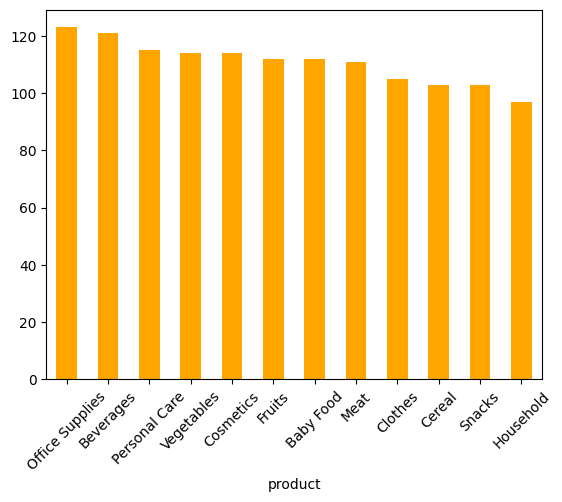

In [ ]:
# two most popular category of products are Office Supplies & Beverages
merged["product"].value_counts().plot(kind="bar", color="orange")
plt.xticks(rotation=45)

plt.show()

In [ ]:
# Identify the top-selling product categories
top_categories = merged.groupby("product")["units_sold"].sum().nlargest(5)

print("\nTop Selling Product Categories:")
print(top_categories)


Top Selling Product Categories:
product
Office Supplies    617641.0
Beverages          613133.0
Fruits             591672.0
Clothes            591385.0
Vegetables         582544.0
Name: units_sold, dtype: float64


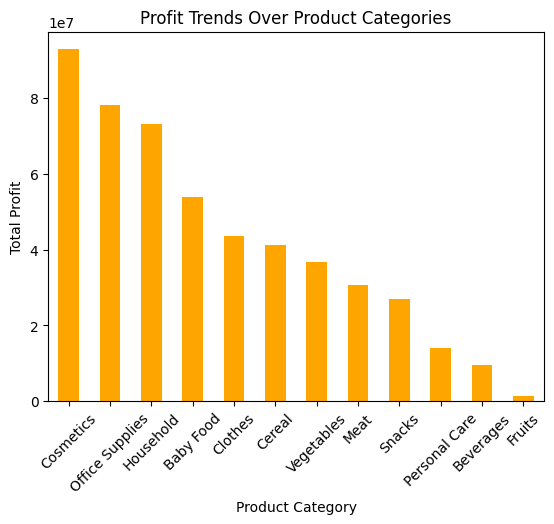

In [ ]:
#Which category gave the higher profit for the company
profit_by_product = merged.groupby('product')[['units_sold', 'price', 'cost']].apply(lambda x: (x['units_sold'] * (x['price'] - x['cost'])).sum())
profit_by_product_sorted = profit_by_product.sort_values(ascending=False)
profit_by_product_sorted.plot(kind="bar",color="orange")
plt.title("Profit Trends Over Product Categories")
plt.xlabel("Product Category")
plt.ylabel("Total Profit")
plt.xticks(rotation=45)

plt.show()

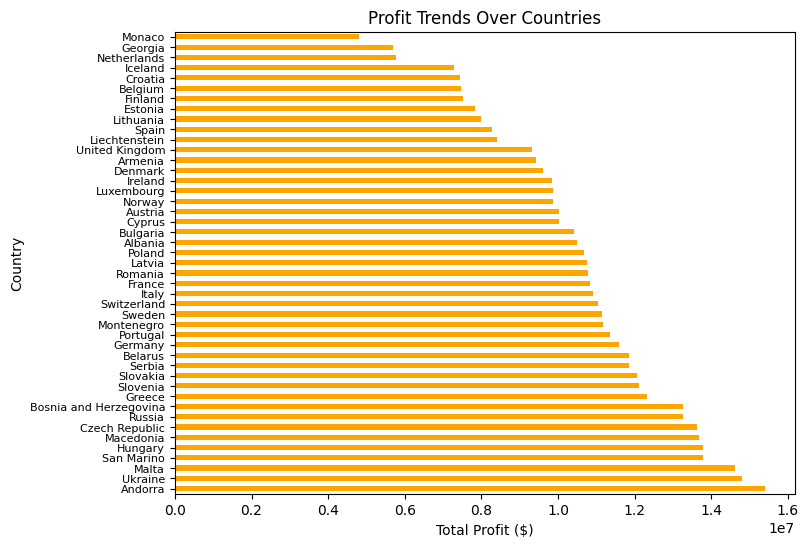

In [ ]:
#Which country gave the higher profit for the company
profit_by_country = merged.groupby('country')[['units_sold', 'price', 'cost']].apply(lambda x: (x['units_sold'] * (x['price'] - x['cost'])).sum())
profit_by_country_sorted = profit_by_country.sort_values(ascending=False)
plt.figure(figsize=(8, 6))
profit_by_country_sorted.plot(kind="barh", color="orange")
plt.title("Profit Trends Over Countries")
plt.xlabel("Total Profit ($)")
plt.ylabel("Country")
plt.yticks(fontsize=8)



plt.show()

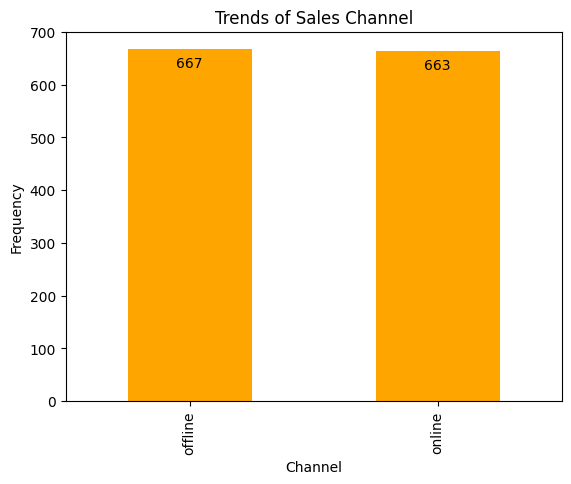

In [ ]:
#two sales channel have similar using
bars = merged["sales_channel"].value_counts().plot(kind="bar", color="orange")
plt.title("Trends of Sales Channel")
plt.xlabel("Channel")
plt.ylabel("Frequency")
# Add data labels
# "patches" attribute in the Axes object contains a list of the bar objects
for bar in bars.patches:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() - 40,
        f"{bar.get_height()}",
        ha="center",
        va="bottom",
        color="black",
        fontsize=10,
    )
plt.show()

#### 4. Time interval between order and shipment

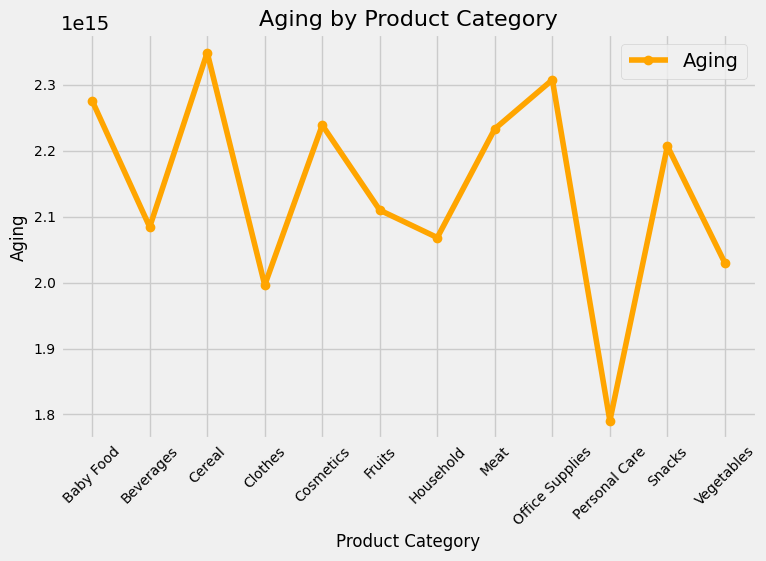

In [ ]:
#Aging by Product Category
#Personal Care was shipped faster than other products
aging_over_product = merged.groupby("product")["aging"].mean()

# Plot the sales trend
plt.figure(figsize=(8, 5))
plt.style.use("fivethirtyeight")
plt.plot(aging_over_product.index, aging_over_product.values, label="Aging",  marker="o", color="orange")
plt.xlabel("Product Category", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel("Aging", fontsize=12)
plt.title("Aging by Product Category", fontsize=16)
plt.legend()
plt.grid(True)
plt.show()

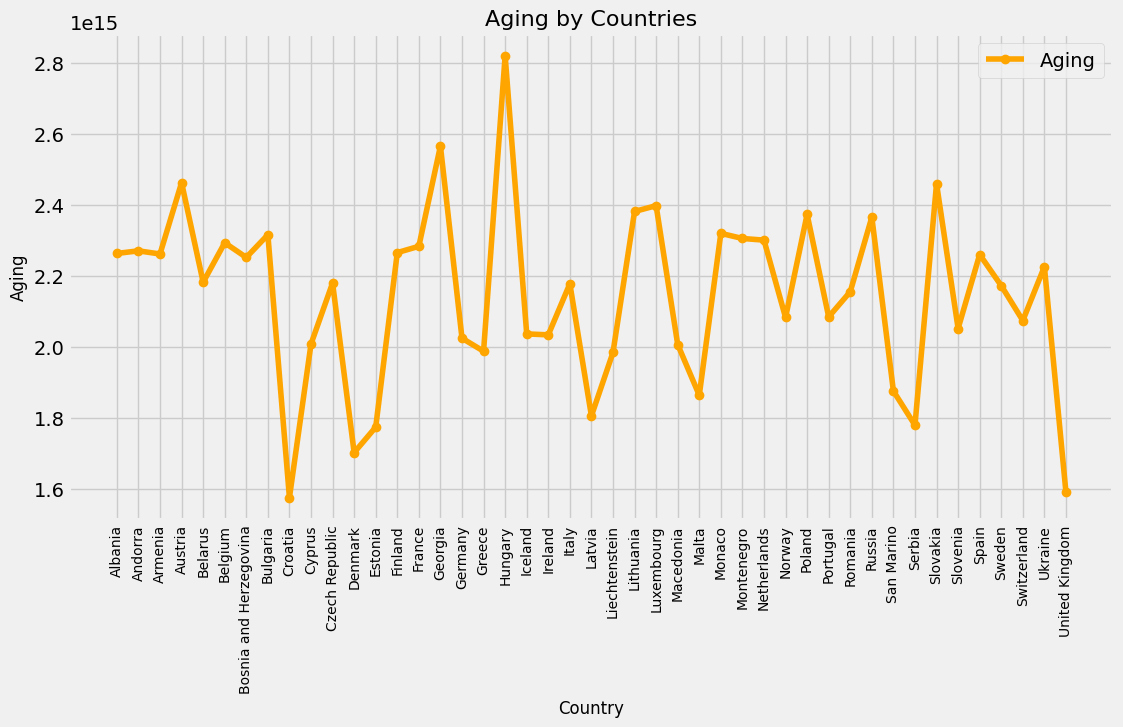

In [ ]:
#Aging by Countries
aging_over_country = merged.groupby("country")["aging"].mean()

# Plot the sales trend
plt.figure(figsize=(12, 6))
plt.plot(aging_over_country.index, aging_over_country.values, label="Aging",marker="o", color="orange")
plt.xlabel("Country", fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.ylabel("Aging", fontsize=12)
plt.title("Aging by Countries",fontsize=16)
plt.legend()
plt.grid(True)
plt.show()

#### Short conclusion:
Products were shipped faster into UK an Croatia than to other countries.

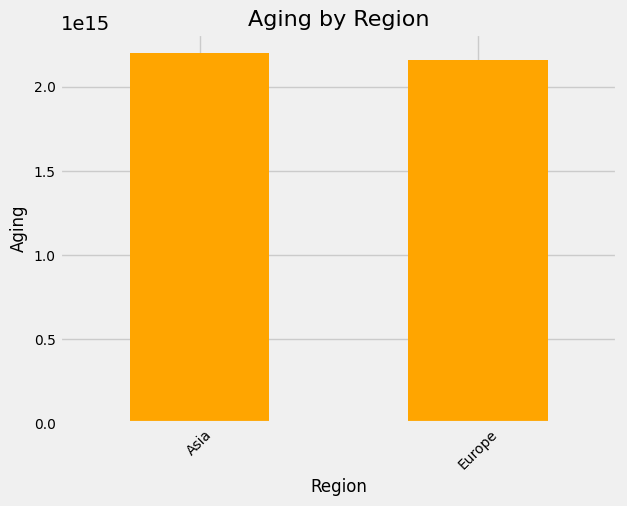

In [ ]:
#Aging by Region

merged.groupby("region")["aging"].median().plot(kind="bar", color="orange")
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.title("Aging by Region", fontsize=16)
plt.xlabel("Region" , fontsize=12)
plt.ylabel("Aging", fontsize=12)


plt.show()

#### Short conclusion:
Products were shipped with similar speed to both regions (a little bit faster to Asia region)

#### 5. Analysis of profit


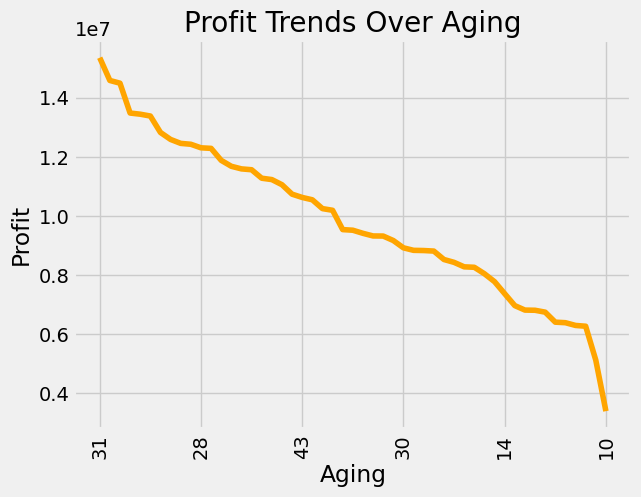

In [ ]:
profit_by_aging = merged.groupby('aging')[['units_sold', 'price', 'cost']].apply(lambda y: (y['units_sold'] * (y['price'] - y['cost'])).sum())
merged["aging"] = merged["aging"].astype(str).str[:2]
profit_by_aging_sorted = profit_by_aging.sort_values(ascending=False)
profit_by_aging_sorted.plot(kind="line", color="orange")
plt.title("Profit Trends Over Aging")
plt.xlabel("Aging")
plt.xticks(rotation=90)
plt.ylabel("Profit")


plt.show()

#### Short conlcusion:
 - We cannot see direct dynamic for profit & aging. However if aging is lower than 14 the profit is aslo haved a tendency to be lower. We remember that "Personan Care" & "Clothing" can be shipped faster, however these categories aren't give the company higher profit.

#### 6. Dynamic of sales
- over categories

There are were analyzed three product categories which provided the company with higher profit.
- over countries
- over region

In [ ]:
# Adding a new column - profit
merged["profit"] = merged["units_sold"] * (merged["price"] - merged["cost"])
print(merged.head())


  order_date  ship_date priority sales_channel  units_sold   price    cost  \
0 2014-10-08 2014-10-18        M        online       650.0  205.70  117.11   
1 2016-08-11 2016-08-11        C       offline      1993.0  205.70  117.11   
2 2014-07-18 2014-08-11        M        online      4693.0  668.27  502.54   
3 2017-05-13 2017-06-13        L        online      1171.0  109.28   35.84   
4 2012-08-11 2012-09-18        H       offline      7648.0   47.45   31.79   

     product     country  region aging     profit  
0     Cereal      Norway  Europe    10   57583.50  
1     Cereal      Serbia  Europe    0   176559.87  
2  Household         NaN     NaN    24  777770.89  
3    Clothes  Montenegro  Europe    31   85998.24  
4  Beverages      Serbia  Europe    38  119767.68  


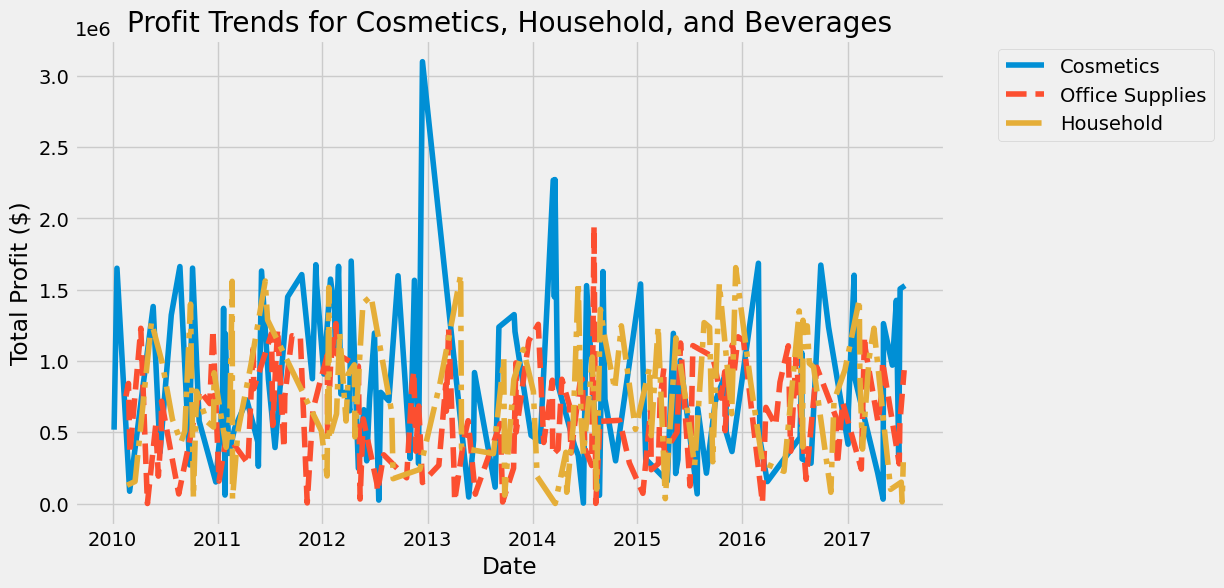

In [ ]:
# 1. Select the 3 desired products
selected_products = ["Cosmetics", "Office Supplies", "Household"]

# 2. Create the time series data for profit, filtered by selected products
time_series_data_profit = (
    merged[merged["product"].isin(selected_products)]
    .groupby(["product", "order_date"])["profit"]
    .sum()
    .reset_index()
)

# 3. Plot the time series data for the selected products
plt.figure(figsize=(10, 6))
line_styles = ["-", "--", "-."]  # Different line styles for each product
for i, product in enumerate(selected_products):
    product_data = time_series_data_profit[time_series_data_profit["product"] == product]
    plt.plot(
        product_data["order_date"],
        product_data["profit"],
        label=product,
        linestyle=line_styles[i % len(line_styles)],
    )  # Using line styles

plt.xlabel("Date")
plt.ylabel("Total Profit ($)")  # More specific y-axis label
plt.title("Profit Trends for Cosmetics, Household, and Beverages")  # More engaging title
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")  # Legend outside plot area
plt.grid(True)
plt.show()

#### Short conlucsion:
 - All dynamic have a seasonal character.
 - Cosmetics have the hiher levels of profit in the end of 2012 (more than 3 mln) and in the beginning of 2014 (approx. 2.25 mln).
 - The highest profit from Office Supplies had been received in the middle of 2014 (almost 2 mln $).
 - The dynamic of profit for Household is looking somehow constant without the highest lalues.

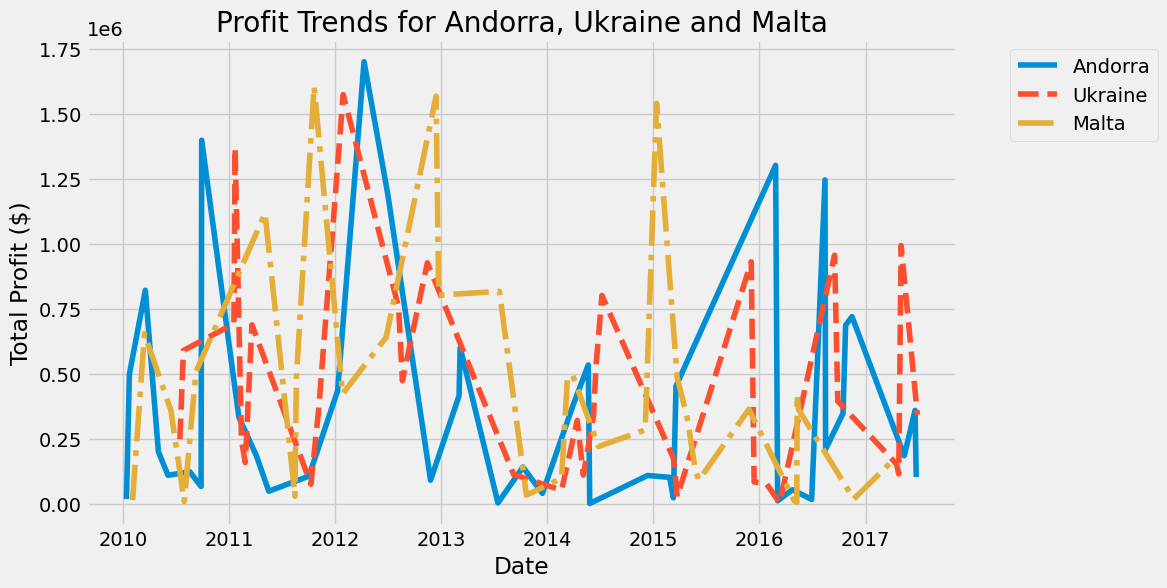

In [ ]:
# 1. Select the 3 desired countries
selected_countries = ["Andorra", "Ukraine", "Malta"]

# 2. Create the time series data for profit, filtered by selected countries
time_series_profit = (
    merged[merged["country"].isin(selected_countries)]
    .groupby(["country", "order_date"])["profit"]
    .sum()
    .reset_index()
)

# 3. Plot the time series data for the selected countries
plt.figure(figsize=(10, 6))
line_styles = ["-", "--", "-."]  # Different line styles for each country
for i, country in enumerate(selected_countries):
    country_data = time_series_profit[time_series_profit["country"] == country]
    plt.plot(
        country_data["order_date"],
        country_data["profit"],
        label=country,
        linestyle=line_styles[i % len(line_styles)],
    )  # Using line styles

plt.xlabel("Date")
plt.ylabel("Total Profit ($)")  # More specific y-axis label
plt.title("Profit Trends for Andorra, Ukraine and Malta")  # More engaging title
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")  # Legend outside plot area
plt.grid(True)
plt.show()

#### Short conclusion:
 - Profit Trends for three most profitable countries (Andorra, Ukraine, Malta) shows us that the highest profit was received in 2012. All three countries gave a profit higher than 1.5 mln $.

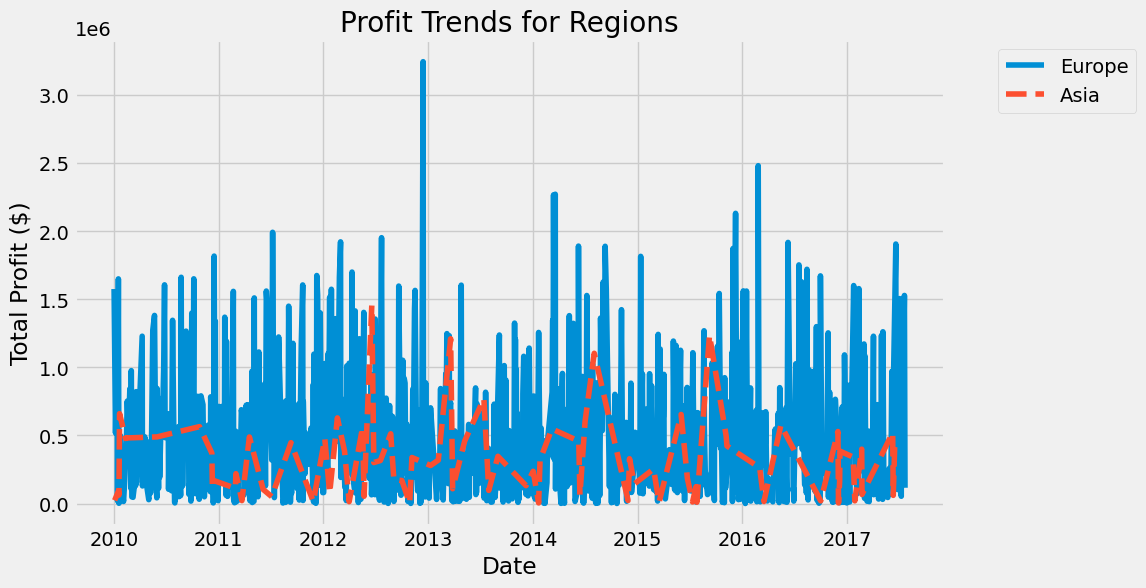

In [ ]:
regions = merged["region"].dropna().unique()
# 1. Create the time series data for profit, filtered by regions
time_series = (
    merged.groupby(["region", "order_date"])["profit"]
    .sum()
    .reset_index()
)

# 2. Plot the time series data for the selected products
plt.figure(figsize=(10, 6))
line_styles = ["-", "--"]  # Different line styles for each region
for i, region in enumerate(regions):
    data = time_series[time_series["region"] == region]
    plt.plot(
        data["order_date"],
        data["profit"],
        label=region,
        linestyle=line_styles[i % len(line_styles)],
    )  # Using line styles

plt.xlabel("Date")
plt.ylabel("Total Profit ($)")  # More specific y-axis label
plt.title("Profit Trends for Regions")  # More engaging title
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")  # Legend outside plot area
plt.grid(True)
plt.show()

#### Short conclusion:
 - Profit Trends for Europe countries much higher than for Asia. They bring highest Total profit in the end of 2012 almost 3 500 000 $.

- The top profit from  Asia was in the middle of 2012 - below 1 500 000 $.

#### 7. Sales by week days & months

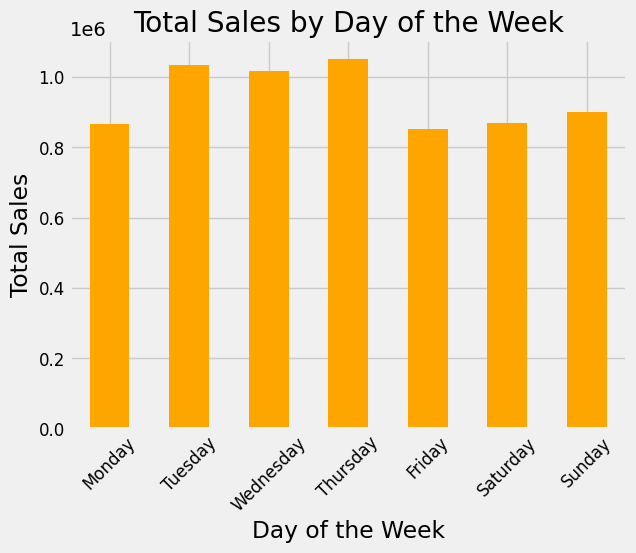

In [ ]:
# Extract the day of the week from the 'order_date' column and create a new column
merged['day_of_week'] = merged['order_date'].dt.day_name()

# Total sales by day of the week
day_of_week_sales = merged.groupby("day_of_week")["units_sold"].sum()
day_of_week_sales.index = [
    "Monday",
    "Tuesday",
    "Wednesday",
    "Thursday",
    "Friday",
    "Saturday",
    "Sunday",
]
day_of_week_sales.plot(
    kind="bar",
    xlabel="Day of the Week",
    ylabel="Total Sales",
    title="Total Sales by Day of the Week", fontsize=16, color="orange"
)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

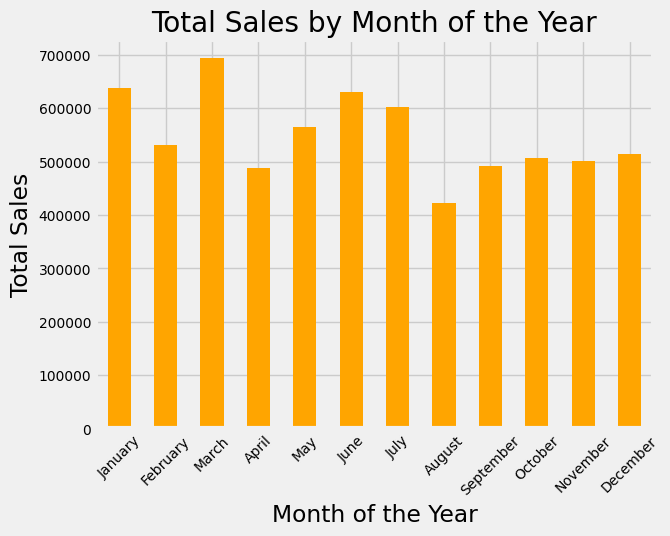

In [ ]:
# Extract the month name from the 'order_date' column and create a new column
merged['month_of_year'] = merged['order_date'].dt.month_name()

# Total sales by month of the year
month_of_year_sales = merged.groupby("month_of_year")["units_sold"].sum()

# Ensure months are in the correct order
month_order = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]
month_of_year_sales = month_of_year_sales.reindex(month_order)

month_of_year_sales.plot(
    kind="bar",
    xlabel="Month of the Year",
    ylabel="Total Sales",
    title="Total Sales by Month of the Year", fontsize=16, color="orange"
)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.show()

#### Short conclusion:
- The customers more often bought the goods in the middle of week.
- We can see seasonal dynamic of sales. They were higher in January, March, June and July.

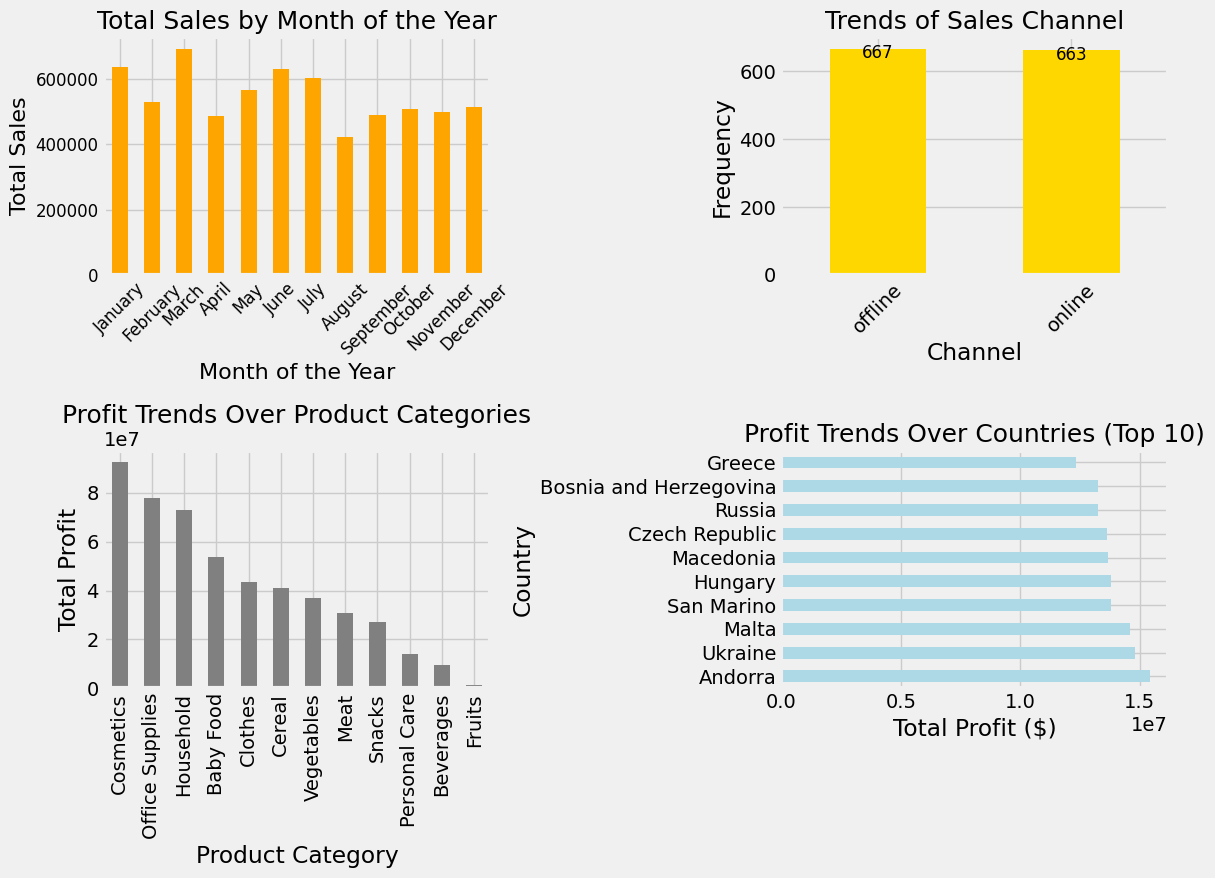

In [ ]:
import matplotlib.pyplot as plt

# Create a figure with 2 rows and 2 columns of subplots
fig, ax = plt.subplots(2, 2, figsize=(12, 9))

# --- Subplot 1: Total Sales by Month ---
# Extract the month name from the 'order_date' column and create a new column
merged['month_of_year'] = merged['order_date'].dt.month_name()

# Total sales by month of the year
month_of_year_sales = merged.groupby("month_of_year")["units_sold"].sum()

# Ensure months are in the correct order
month_order = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]
month_of_year_sales = month_of_year_sales.reindex(month_order)

month_of_year_sales.plot(
    kind="bar",
    ax=ax[0, 0],  # Plot on the top-left subplot
    xlabel="Month of the Year",
    ylabel="Total Sales",
    title= "Total Sales by Month of the Year", color="orange"
)
ax[0, 0].set_title("Total Sales by Month of the Year", fontsize=18)  # Title font size
ax[0, 0].set_xlabel("Month of the Year", fontsize=16)  # X-axis label font size
ax[0, 0].set_ylabel("Total Sales", fontsize=16)  # Y-axis label font size
ax[0, 0].tick_params(axis='x', labelsize=12, rotation=45)  # X-axis tick font size and rotation
ax[0, 0].tick_params(axis='y', labelsize=12)  # Y-axis tick font size

# --- Subplot 2: Total Sales by Sales Channel ---
bars = merged["sales_channel"].value_counts().plot(
    kind="bar", color="gold", ax=ax[0, 1]  # Plot on the top-right subplot
)
# Add data labels
for bar in bars.patches:
    ax[0, 1].text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() - 40,
        f"{bar.get_height()}",
        ha="center",
        va="bottom",
        color="black",
        fontsize=12,
    )
ax[0, 1].set_title("Trends of Sales Channel", fontsize = 18)
ax[0, 1].set_xlabel("Channel")
ax[0, 1].set_ylabel("Frequency")
ax[0, 1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels


# --- Subplot 3: Profit by Product Category ---
profit_by_product = merged.groupby('product')[['units_sold', 'price', 'cost']].apply(
    lambda x: (x['units_sold'] * (x['price'] - x['cost'])).sum()
)
profit_by_product_sorted = profit_by_product.sort_values(ascending=False)
profit_by_product_sorted.plot(
    kind="bar", color="grey", ax=ax[1, 0]  # Plot on the bottom-left subplot
)
ax[1, 0].set_title("Profit Trends Over Product Categories", fontsize = 18)
ax[1, 0].set_xlabel("Product Category")
ax[1, 0].set_ylabel("Total Profit")
ax[1, 0].tick_params(axis='x', rotation=90)  # Rotate x-axis labels


# --- Subplot 4: Profit by Country (Top 10) ---
profit_by_country = merged.groupby('country')[['units_sold', 'price', 'cost']].apply(
    lambda x: (x['units_sold'] * (x['price'] - x['cost'])).sum()
)
profit_by_country_sorted = profit_by_country.sort_values(ascending=False).head(10)  # Top 10 countries
profit_by_country_sorted.plot(
    kind="barh", color="lightblue", ax=ax[1, 1]  # Plot on the bottom-right subplot
)
ax[1, 1].set_title("Profit Trends Over Countries (Top 10)", fontsize = 18)
ax[1, 1].set_xlabel("Total Profit ($)")
ax[1, 1].set_ylabel("Country")

# Adjust layout and display the figure
plt.tight_layout()
plt.show()

### Conclusions
The analysis performed in the notebook focuses on sales and profit trends for a business selling various products across different countries and regions. Key observations include:

**Profitability**: Total Profit during the analyzed period is 501 829 110.24 $ and products were sold in 46 countries. The categories of goods with highest profit are: Cosmetics, Office Supplies and Household.

**Sales Channels**: Both online and offline sales channels contribute almost equally to the overall sales.

**Regional Performance**:
- Europe is a significantly more profitable region compared to Asia.
(_They bring highest total profit in the end of 2012 almost 3.5 mln of dollars.The top profit from  Asia was in the middle of 2012 - below 1.5 mln of dollars_)
- Andorra, Ukraine, and Malta are the top-performing countries in terms of profit generation. Each country gave the company almost 15 000 000 $.

**Seasonal Trends**: Sales exhibit seasonality, with higher sales observed in January, March, June, and July. Profit trends also show seasonal variations, with peaks occurring at different times for different product categories.

**Shipping Time**: Shipping time (aging) does not appear to have a significant impact on overall profit. While some product categories and countries experience faster shipping times, they do not necessarily correlate with higher profits.
_(Personal Care was shipped faster than other products. However these goods are not so profitable. Also UK an Croatia received the goods faster. However these countries are not included in list of top 10 profitable countries. If we look at aging by region - products were shipped with similar speed to both regions.)_

**Day of Week**: Sales are generally higher during the middle of the week.








### Recommendations

_**Focus on high-profit product categories**_: Allocate more resources and marketing efforts towards the Cosmetics, Office Supplies, and Household categories to maximize profitability. Consider offering promotions or bundles to further boost sales in these categories.

_**Prioritize European markets**_: Given the significantly higher profitability of the European region, particularly countries like Andorra, Ukraine, and Malta, consider expanding operations and marketing efforts in these areas.

_**Optimize sales strategies during peak seasons**_: Capitalize on the seasonal sales trends by implementing targeted marketing campaigns and inventory management strategies during January, March, June, and July to meet increased customer demand.

_**Review pricing and cost structure**_: While shipping time doesn't heavily influence profit, it's crucial to continuously evaluate pricing and cost structures for all product categories to ensure optimal profitability. Identify opportunities to reduce costs without compromising product quality or customer satisfaction.

_**Leverage both sales channels**_: Maintain a balanced approach between online and offline sales channels, ensuring a seamless customer experience across both platforms. Consider implementing strategies to enhance customer engagement and retention in both channels.
